In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from logomaker import transform_matrix
from pssm_analysis import calc_pssm_from_msa, plot_pssm, plot_logomaker 

NUM_CLASSES = 21
AA_ALPHABETS = "ACDEFGHIKLMNPQRSTVWY-"

# Load Data

In [2]:
clade = 'AGO'
msa_path = f'/home/moon/projects/AgoAnalysis/msa/{clade}.msa.fasta'

pssm = calc_pssm_from_msa(msa_path, NUM_CLASSES)

# PSSM Heatmap

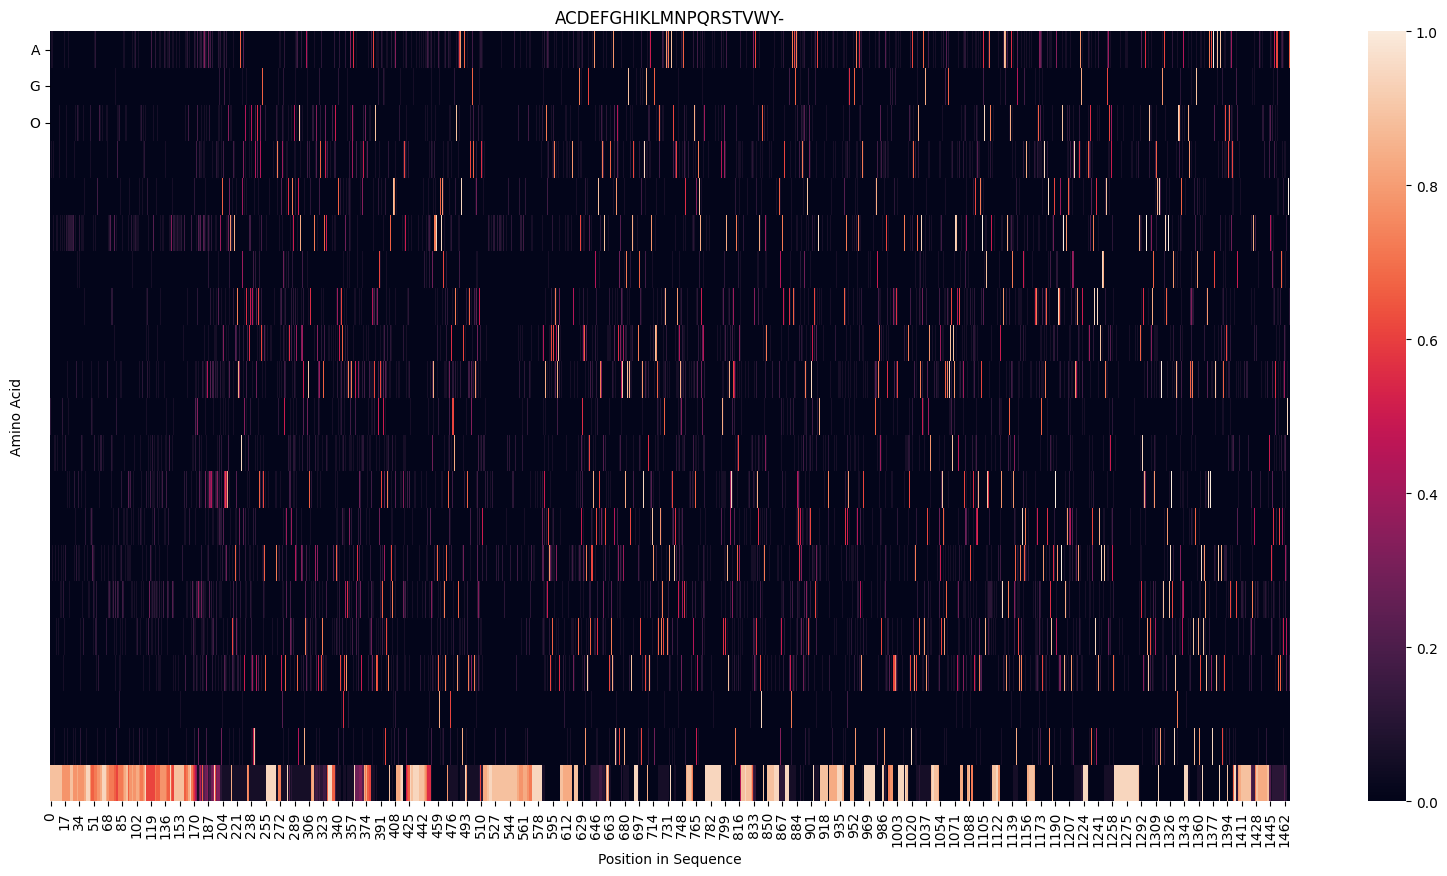

In [3]:
plot_pssm(pssm, f'{clade}', AA_ALPHABETS)

# pssm_outpath = f'/home/moon/projects/AgoAnalysis/msa/{clade}.msa.pssm.png'
# plt.savefig(pssm_outpath)

plt.show()

In [4]:
### Bokeh

# from bokeh.palettes import viridis, RdBu
# from bokeh.transform import linear_cmap
# from bokeh.plotting import figure, show, output_file, save

# def pssm_to_dataframe(pssm, esm_alphabet):
#   sequence_length = pssm.shape[0]
#   idx = [str(i) for i in np.arange(1, sequence_length + 1)]
#   df = pd.DataFrame(pssm, index=idx, columns=list(esm_alphabet))
#   df = df.stack().reset_index()
#   df.columns = ['Position', 'Amino Acid', 'Probability']
#   return df

# pssm = calculate_pssm(msas)
# df = pssm_to_dataframe(pssm, AA_ALPHABETS)

# N = pssm.shape[0]

# # plot pssm
# num_colors = 256  # You can adjust this number
# palette = viridis(256)
# TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
# p = figure(title="CONSERVATION",
#            x_range=[str(x) for x in range(1,N)],
#            y_range=list(AA_ALPHABETS)[::-1],
#            width=900, height=400,
#            tools=TOOLS, toolbar_location='below',
#            tooltips=[('Position', '@Position'), ('Amino Acid', '@{Amino Acid}'), ('Probability', '@Probability')])

# r = p.rect(x="Position", y="Amino Acid", width=1, height=1, source=df,
#            fill_color=linear_cmap('Probability', palette, low=0, high=1),
#            line_color=None)
# p.xaxis.visible = False  # Hide the x-axis
# # show(p)

# output_file(f"/home/moon/projects/AgoAnalysis/msa/{clade}.msa.pssm.html")
# save(p)

# Logomaker

In [5]:
pssm_df = pd.DataFrame(pssm, columns=list(AA_ALPHABETS), dtype=np.float64)

background_vals = np.array([1/20]*len(AA_ALPHABETS))
ic_df = transform_matrix(pssm_df, from_type='probability', to_type='information', background=background_vals)

# background_dict = {aa: 1/20 for aa in AA_ALPHABETS}
# ic_df = calc_information_content(pssm_df, background_dict)

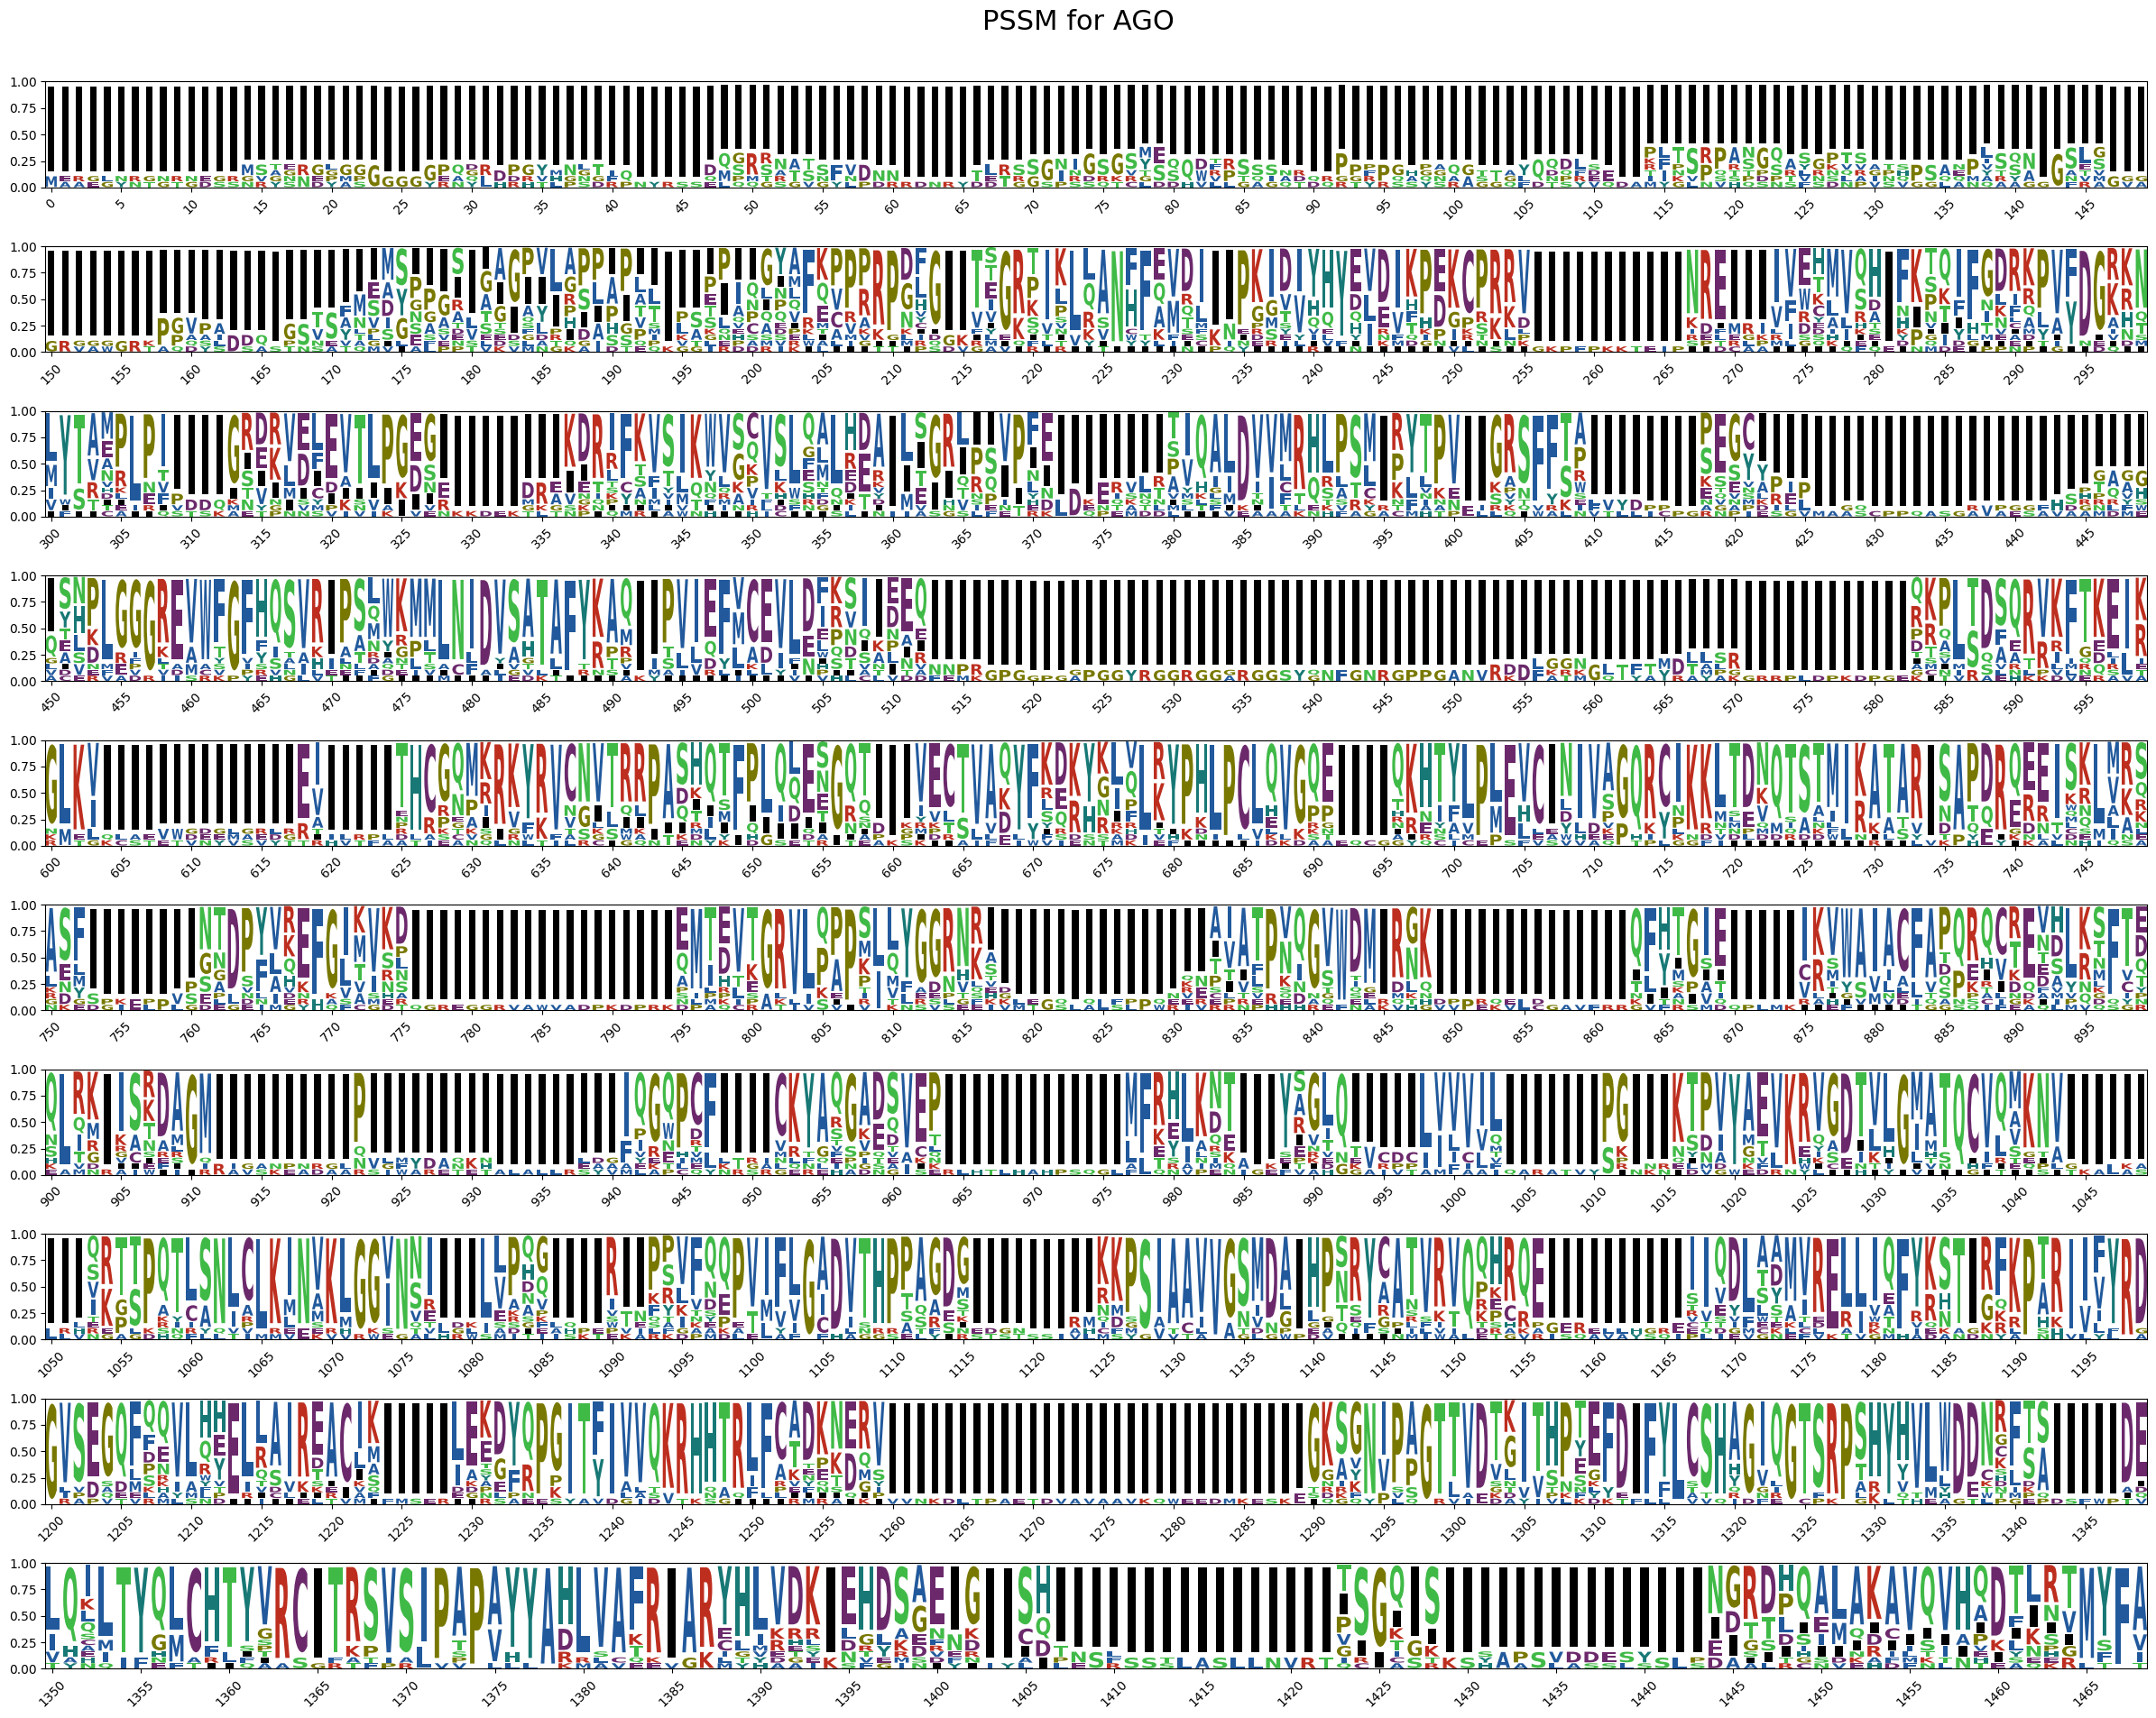

In [6]:
title = f'PSSM for {clade}'
plot_logomaker(pssm_df.iloc[:, 0:21], length_per_row=150, title=title)
# plt.savefig(f'/home/moon/projects/AgoAnalysis/msa/{clade}.msa.pssm_logo.png')
plt.show()

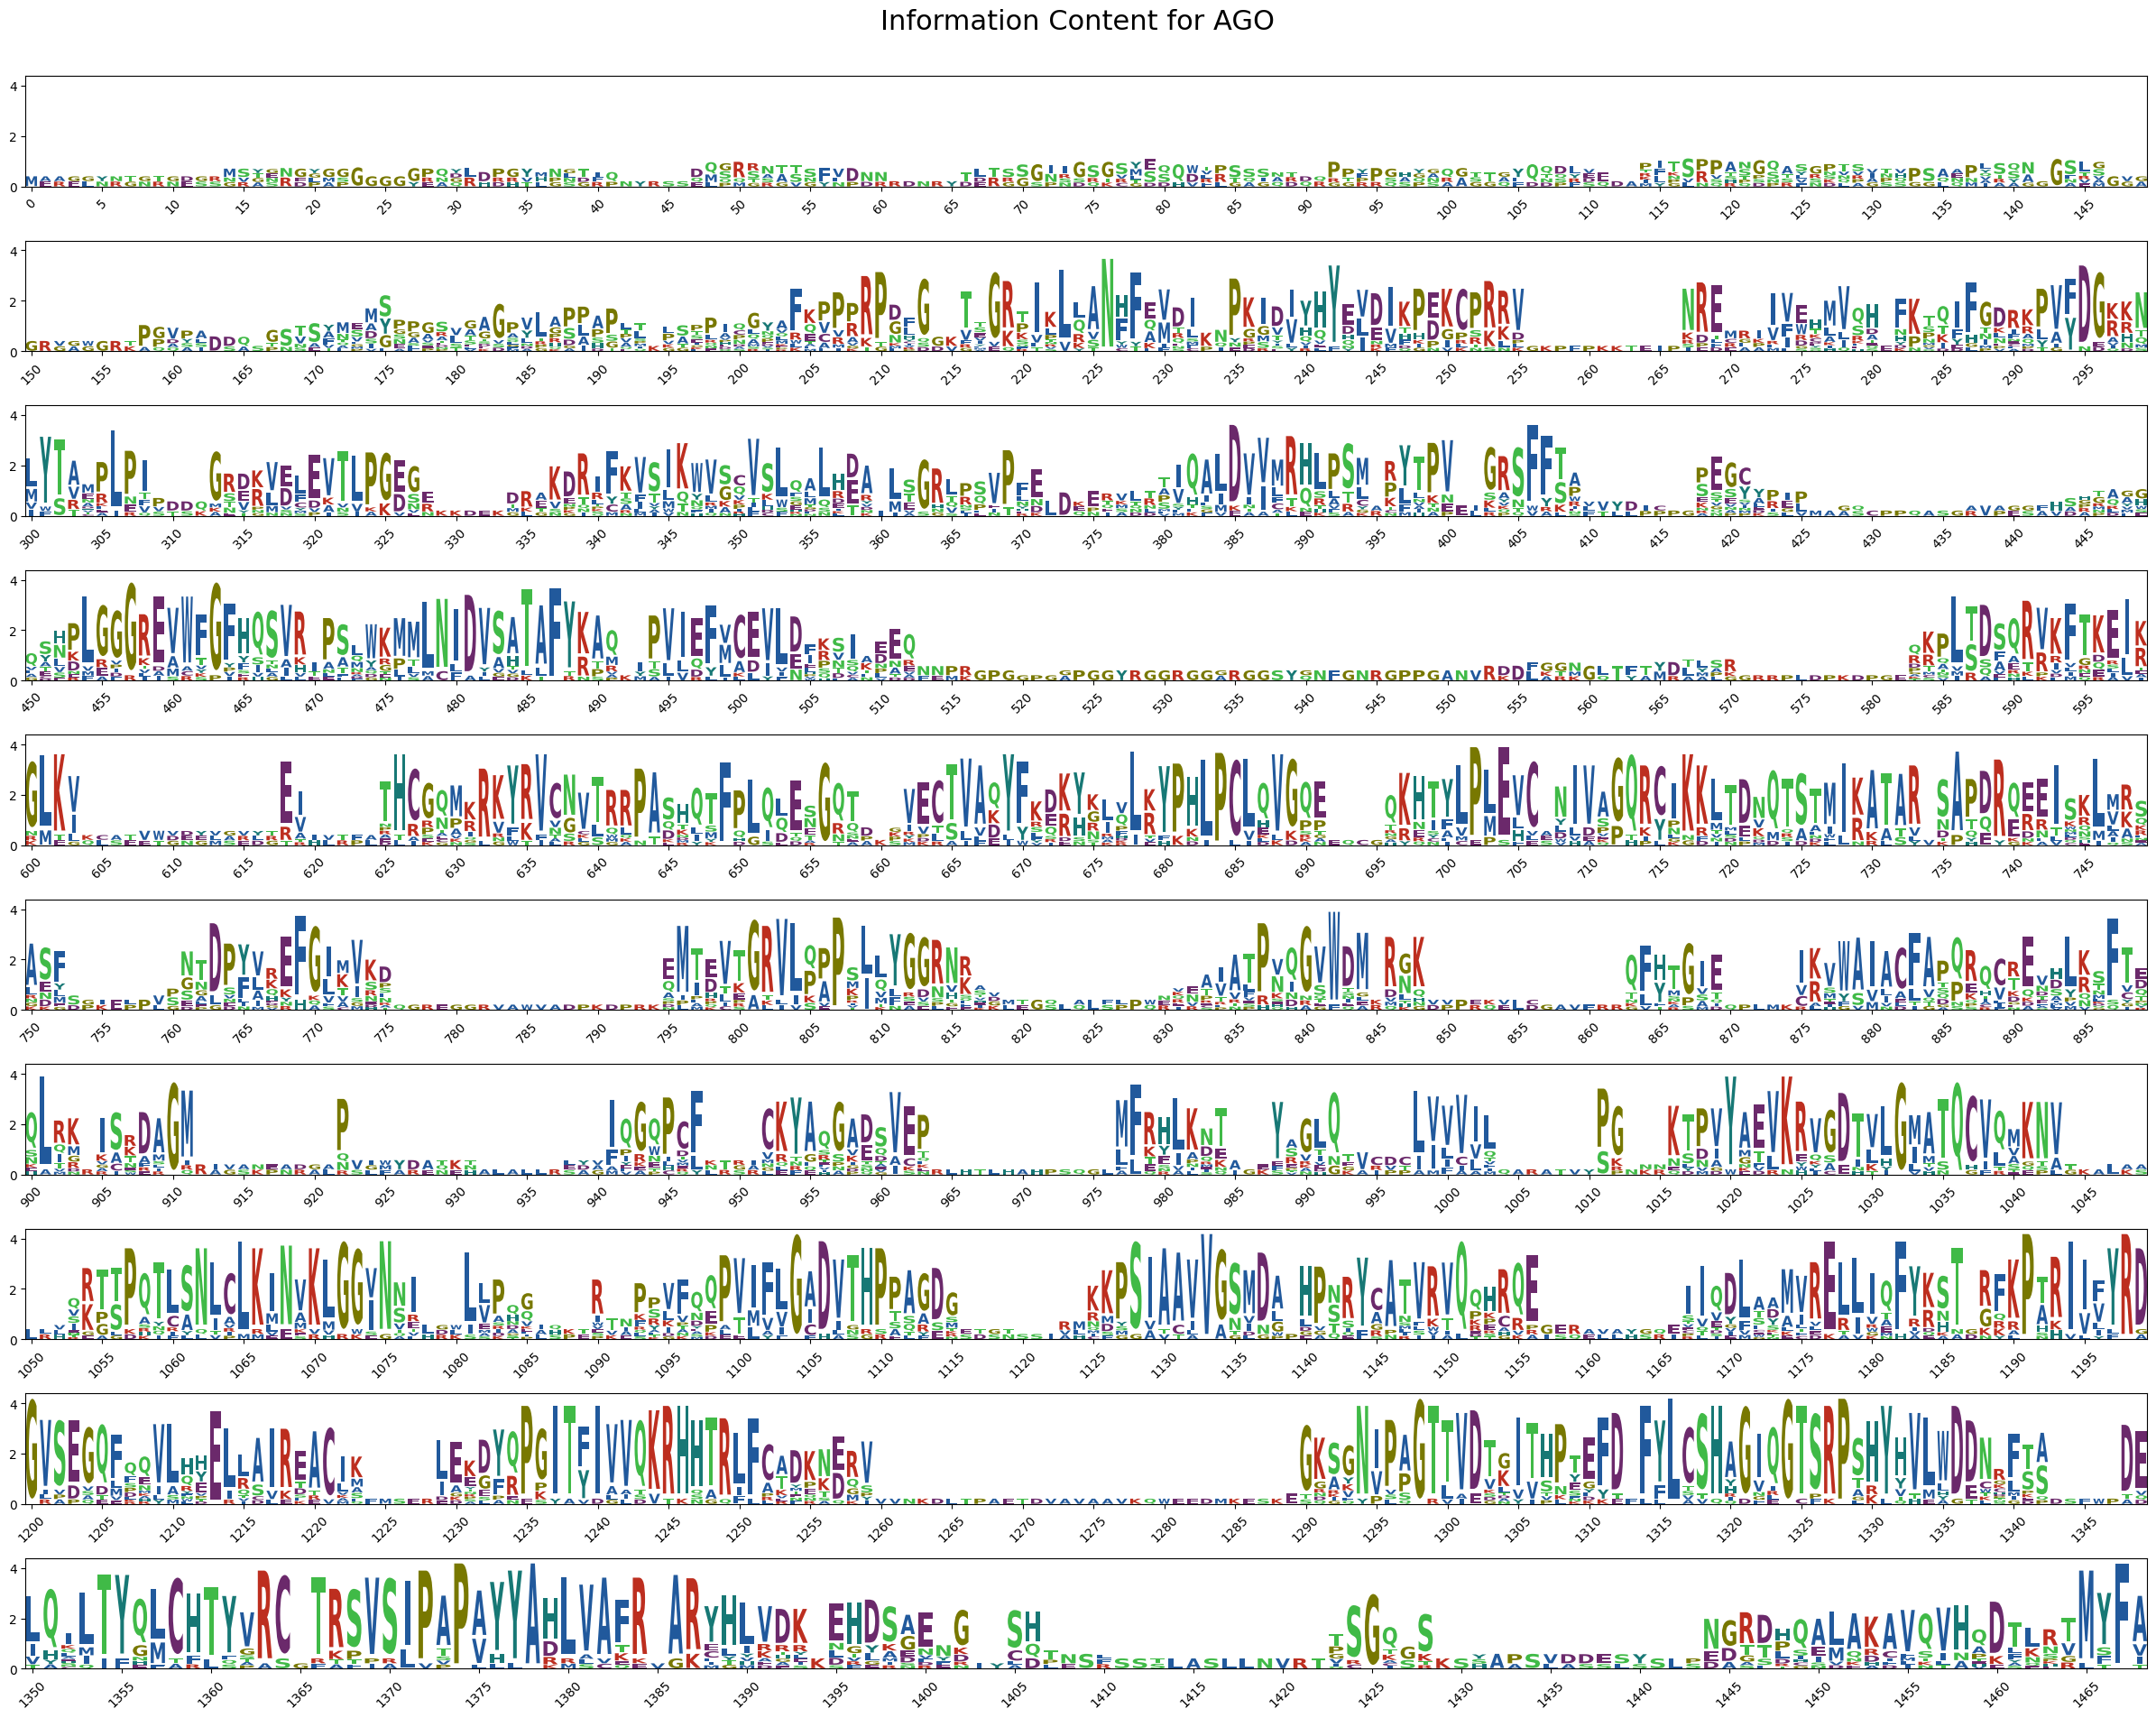

In [9]:
title = f'Information Content for {clade}'
plot_logomaker(ic_df.iloc[:, 1:21], length_per_row=150, title=title)
# plt.savefig(f'/home/moon/projects/AgoAnalysis/msa/{clade}.msa.pssm_logo.png')
plt.show()